In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [7]:
df_MAIN = pd.read_csv("../Data Collection/final_relevant_df.csv")
df_MAIN.rename(columns={'key': 'company ISIN'}, inplace=True)
df_MAIN

,Unnamed: 0,Year,Total Return,ESG Score,ESG Combined Score,ESG Controversies Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,company ISIN,...,Volume,Company Market Cap,EBITDA - Mean,Instrument,Country of Headquarters,Region of Headquarters,TRBC Industry Name,TRBC Industry Group Name,TRBC Business Sector Name,TRBC Economic Sector Name
0,0,2002,-4.703688,10.732601,10.732601,100.0,16.469428,16.153846,0.000000,DK0010244508,...,0.0,5.201496e+10,1.929737e+09,DK0010244508,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
1,1,2003,78.725725,16.933543,16.933543,100.0,19.033531,34.523810,0.000000,DK0010244508,...,0.0,1.828570e+11,6.631311e+09,DK0010244508,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
2,2,2004,6.899061,17.855846,17.855846,100.0,20.465337,26.862745,7.523148,DK0010244508,...,0.0,1.980218e+11,8.512478e+09,DK0010244508,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
3,3,2005,45.463359,16.395483,16.395483,100.0,20.152244,17.166667,11.683007,DK0010244508,...,0.0,2.821975e+11,8.136144e+09,DK0010244508,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
4,4,2006,-17.550102,18.732474,18.732474,60.0,20.633013,25.500000,11.033951,DK0010244508,...,0.0,2.292305e+11,9.496474e+09,DK0010244508,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78513,78513,2019,26.394231,15.634041,15.634041,100.0,34.005387,9.318397,0.000000,US2825591033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78514,78514,2020,-7.303157,16.460435,16.460435,100.0,31.797347,13.460427,0.000000,US2825591033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78515,78515,2021,-46.368486,20.954503,20.954503,100.0,29.832687,26.835159,0.000000,US2825591033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78516,78516,2020,16.224490,37.367401,37.367401,100.0,45.666329,33.923344,21.332694,US65443P1021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# summary statistics for each column
df_MAIN.describe()

,Unnamed: 0,Year,Total Return,ESG Score,ESG Combined Score,ESG Controversies Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Revenue - Mean,Earnings Per Share - Mean,Return On Equity - Mean,Volume,Company Market Cap,EBITDA - Mean
count,78518.000000,78518.000000,78518.000000,78518.000000,78518.000000,78518.000000,78518.000000,78518.000000,78518.000000,6.639200e+04,66657.000000,61217.000000,7.249200e+04,7.252300e+04,5.991900e+04
mean,39258.500000,2015.411460,22.389496,42.959969,41.591191,92.414474,43.341436,49.349823,34.939033,6.917668e+11,226.072825,13.740083,2.293743e+06,9.583685e+11,1.230452e+11
std,22666.338555,4.938848,1498.768525,20.669228,19.549302,20.860966,23.665218,22.497985,28.804813,5.992057e+12,3121.659721,122.437331,3.653830e+07,1.294205e+13,1.478200e+12
min,0.000000,2002.000000,-99.746078,0.402390,0.402390,0.434783,0.052692,0.055461,0.000000,-8.574550e+07,-187677.222700,-7187.000000,0.000000e+00,4.349807e+05,-3.694559e+12
25%,19629.250000,2012.000000,-12.713076,26.355972,26.111188,100.000000,24.388553,31.272302,6.792453,8.998769e+08,0.322632,6.438090,0.000000e+00,1.560195e+09,1.983403e+08
50%,39258.500000,2017.000000,8.607150,41.217956,40.173941,100.000000,41.084089,49.699454,30.733845,4.646065e+09,1.508680,11.646110,1.457600e+04,7.440000e+09,8.982557e+08
75%,58887.750000,2019.000000,32.835048,58.777385,56.140109,100.000000,61.423911,67.500613,59.058696,3.280946e+10,4.968100,18.785400,3.336142e+05,5.226952e+10,6.262596e+09
max,78517.000000,2022.000000,418378.749245,95.432823,94.954180,100.000000,99.564164,99.622901,99.228074,2.780258e+14,287147.809780,22639.930000,7.450699e+09,8.909088e+14,8.767158e+13


In [9]:
# Drop rows with any missing values and save the result to a new DataFrame called df_MAIN_cleaned
df_MAIN_cleaned = df_MAIN.dropna()
df_MAIN_cleaned.describe()

,Unnamed: 0,Year,Total Return,ESG Score,ESG Combined Score,ESG Controversies Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Revenue - Mean,Earnings Per Share - Mean,Return On Equity - Mean,Volume,Company Market Cap,EBITDA - Mean
count,55211.000000,55211.000000,55211.000000,55211.000000,55211.000000,55211.000000,55211.000000,55211.000000,55211.000000,5.521100e+04,55211.000000,55211.000000,5.521100e+04,5.521100e+04,5.521100e+04
mean,36762.475213,2015.018511,23.655591,45.405481,43.860993,91.538673,45.711694,50.974807,38.540795,7.595731e+11,259.245151,14.139775,2.037677e+06,9.973049e+11,1.323962e+11
std,20952.667200,4.952276,1782.492642,20.609908,19.502482,21.745803,23.801187,22.318152,28.688085,6.309029e+12,3325.458021,128.539191,2.042557e+07,1.151227e+13,1.537329e+12
min,0.000000,2002.000000,-97.423072,0.402390,0.402390,0.434783,0.147770,0.249062,0.000000,-1.364125e+07,-187677.222700,-7187.000000,0.000000e+00,4.751800e+06,-3.694559e+12
25%,18709.500000,2011.000000,-12.133027,28.808450,28.444965,100.000000,26.640121,33.304667,11.714642,1.276460e+09,0.357890,6.302680,0.000000e+00,2.402794e+09,2.588330e+08
50%,37042.000000,2016.000000,9.159964,44.800967,43.324492,100.000000,44.453406,51.611444,37.348348,5.895992e+09,1.572670,11.899120,1.429400e+04,1.007222e+10,1.079238e+09
75%,54837.500000,2019.000000,32.895943,61.482408,58.556049,100.000000,64.432512,69.078783,62.802531,4.186957e+10,5.413925,19.426145,3.853745e+05,7.045647e+10,7.604913e+09
max,72675.000000,2022.000000,418378.749245,95.409003,94.954180,100.000000,99.564164,99.622901,99.228074,2.780258e+14,287147.809780,22639.930000,2.278282e+09,6.166784e+14,8.767158e+13


In [10]:
#   Columns in df_MAIN_cleaned

#   ['Year',
#  'Total Return',
#  'ESG Score',
#  'ESG Combined Score',
#  'ESG Controversies Score',
#  'Social Pillar Score',
#  'Governance Pillar Score',
#  'Environmental Pillar Score',
#  'company ISIN',
#  'Revenue - Mean',
#  'Earnings Per Share - Mean',
#  'Return On Equity - Mean',
#  'Volume',
#  'Company Market Cap',
#  'EBITDA - Mean',
#  'Instrument',
#  'Country of Headquarters',
#  'Region of Headquarters',
#  'TRBC Industry Name',
#  'TRBC Industry Group Name',
#  'TRBC Business Sector Name',
#  'TRBC Economic Sector Name']

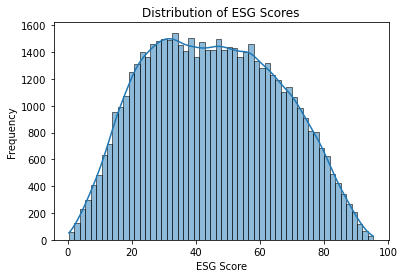

In [11]:
# 1. Distribution of ESG scores
sns.histplot(data=df_MAIN_cleaned, x='ESG Score', kde=True)
plt.title('Distribution of ESG Scores')
plt.xlabel('ESG Score')
plt.ylabel('Frequency')
plt.show()

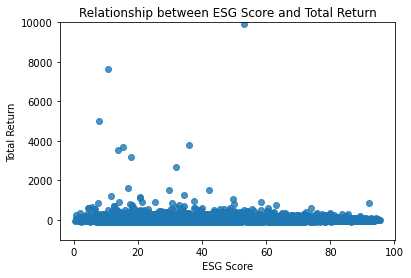

In [12]:
# Relationship between ESG score and total return
sns.regplot(data=df_MAIN_cleaned, x='ESG Score', y='Total Return')
plt.title('Relationship between ESG Score and Total Return')
plt.xlabel('ESG Score')
plt.ylabel('Total Return')
plt.ylim(bottom=-1000, top=10000)
plt.show()

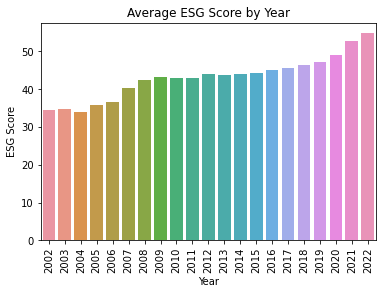

In [54]:
# Average ESG score by year

sns.barplot(data=df_MAIN_cleaned, x='Year', y='ESG Score', ci=None)
plt.title('Average ESG Score by Year')
plt.xlabel('Year')

plt.xticks(rotation=90)
plt.ylabel('ESG Score')
plt.show()

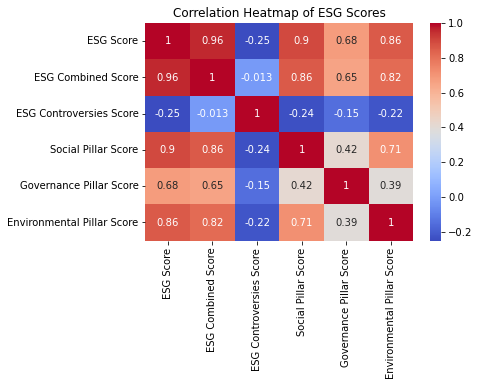

In [14]:
# Correlation heatmap of 'ESG scores'
esg_cols = ['ESG Score', 'ESG Combined Score', 'ESG Controversies Score', 
            'Social Pillar Score', 'Governance Pillar Score', 'Environmental Pillar Score']
corr = df_MAIN_cleaned[esg_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of ESG Scores')
plt.show()

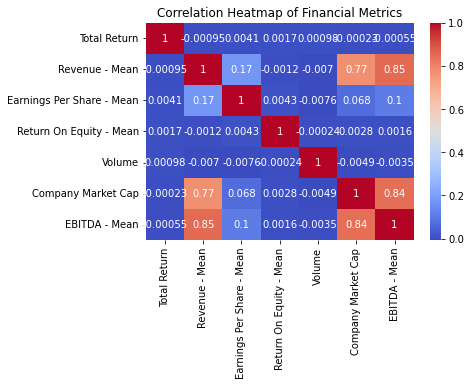

In [15]:
# Correlation heatmap of 'financial metrics'
financial_cols = ['Total Return', 'Revenue - Mean', 'Earnings Per Share - Mean', 
                  'Return On Equity - Mean', 'Volume', 'Company Market Cap', 'EBITDA - Mean']
corr = df_MAIN_cleaned[financial_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Financial Metrics')
plt.show()

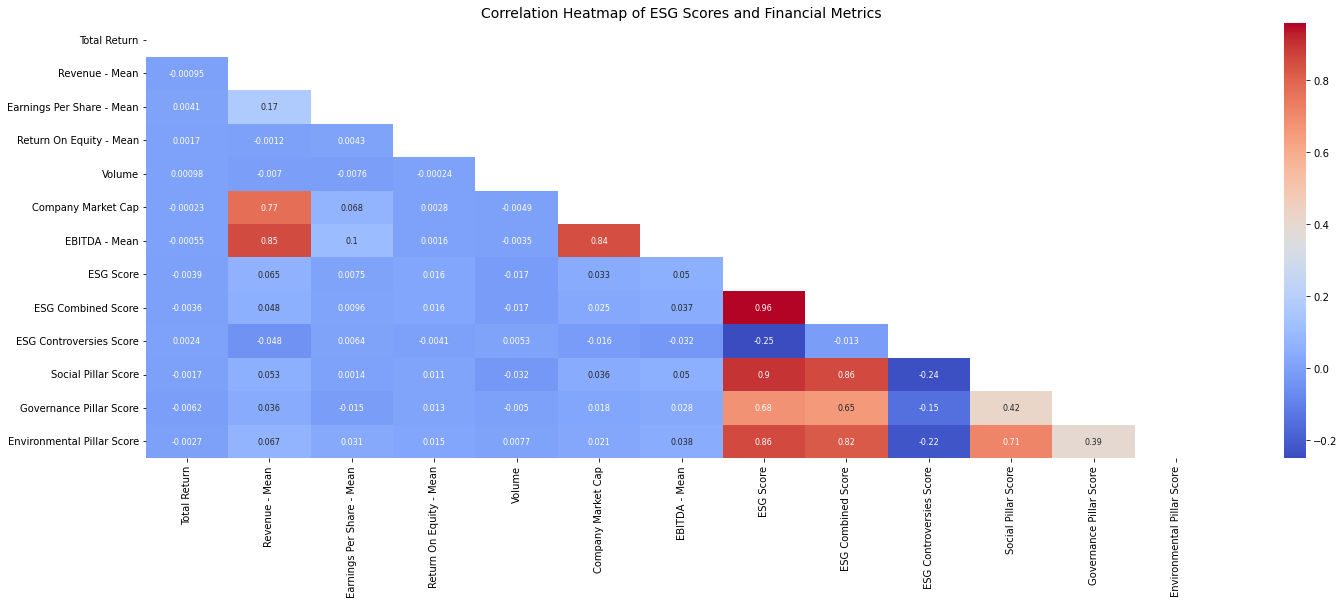

In [40]:
# Correlation heatmap of 'ESG scores' and 'financial metrics'
financial_cols = ['Total Return', 'Revenue - Mean', 'Earnings Per Share - Mean', 
                  'Return On Equity - Mean', 'Volume', 'Company Market Cap', 'EBITDA - Mean']
esg_cols = ['ESG Score', 'ESG Combined Score', 'ESG Controversies Score', 
            'Social Pillar Score', 'Governance Pillar Score', 'Environmental Pillar Score']
cols = financial_cols + esg_cols
corr = df_MAIN_cleaned[cols].corr()

fig, ax = plt.subplots(figsize=(24, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', annot_kws={"fontsize":8})
plt.title('Correlation Heatmap of ESG Scores and Financial Metrics', fontsize=14)
plt.show()

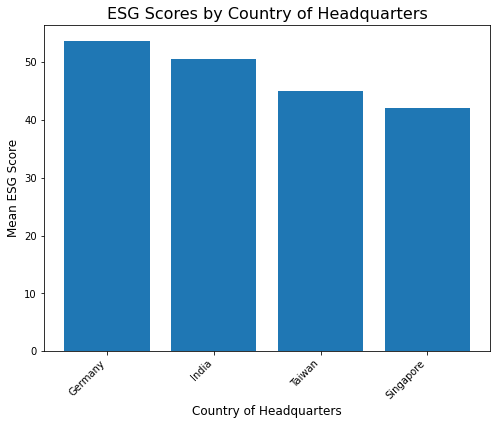

In [17]:
# ESG scores by country of headquarters (aggregated)
selected_countries = ['India', 'Germany', 'Taiwan', 'Singapore']
esg_by_country = df_MAIN_cleaned[df_MAIN_cleaned['Country of Headquarters'].isin(selected_countries)]
esg_by_country = esg_by_country.groupby('Country of Headquarters')['ESG Score'].mean().reset_index()
esg_by_country = esg_by_country.sort_values('ESG Score', ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(x=esg_by_country['Country of Headquarters'], height=esg_by_country['ESG Score'])
plt.title('ESG Scores by Country of Headquarters', fontsize=16)
plt.xlabel('Country of Headquarters', fontsize=12)
plt.ylabel('Mean ESG Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=10)
plt.show()

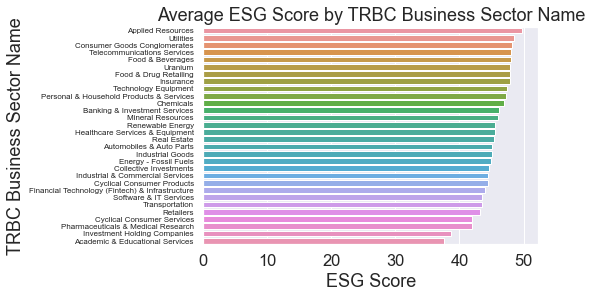

In [61]:
# Average ESG score by TRBC Business Sector Name, sorted by ascending ESG score
esg_by_sector = df_MAIN_cleaned.groupby('TRBC Business Sector Name')['ESG Score'].mean().reset_index()
esg_by_sector = esg_by_sector.sort_values('ESG Score', ascending=False)
sns.set(font_scale=1.5)
sns.barplot(data=esg_by_sector, y='TRBC Business Sector Name', x='ESG Score', ci=None)
plt.yticks(fontsize=8)
plt.title('Average ESG Score by TRBC Business Sector Name')
plt.ylabel('TRBC Business Sector Name')
plt.xlabel('ESG Score')
plt.show()

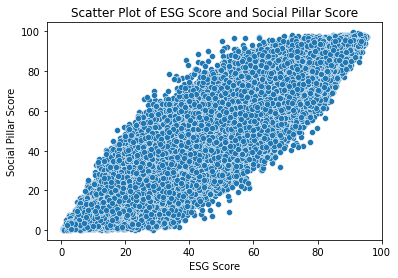

In [19]:
# Scatter plot of ESG score and social pillar score
sns.scatterplot(data=df_MAIN_cleaned, x='ESG Score', y='Social Pillar Score')
plt.title('Scatter Plot of ESG Score and Social Pillar Score')
plt.xlabel('ESG Score')
plt.ylabel('Social Pillar Score')
plt.show()

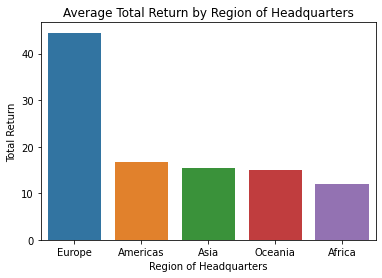

In [20]:
# Average total return by region of headquarters
total_return_by_region = df_MAIN_cleaned.groupby('Region of Headquarters')['Total Return'].mean().reset_index()
total_return_by_region = total_return_by_region.sort_values('Total Return', ascending=False)

sns.barplot(data=total_return_by_region, x='Region of Headquarters', y='Total Return', ci=None)
plt.title('Average Total Return by Region of Headquarters')
plt.xlabel('Region of Headquarters')
plt.ylabel('Total Return')
plt.show()

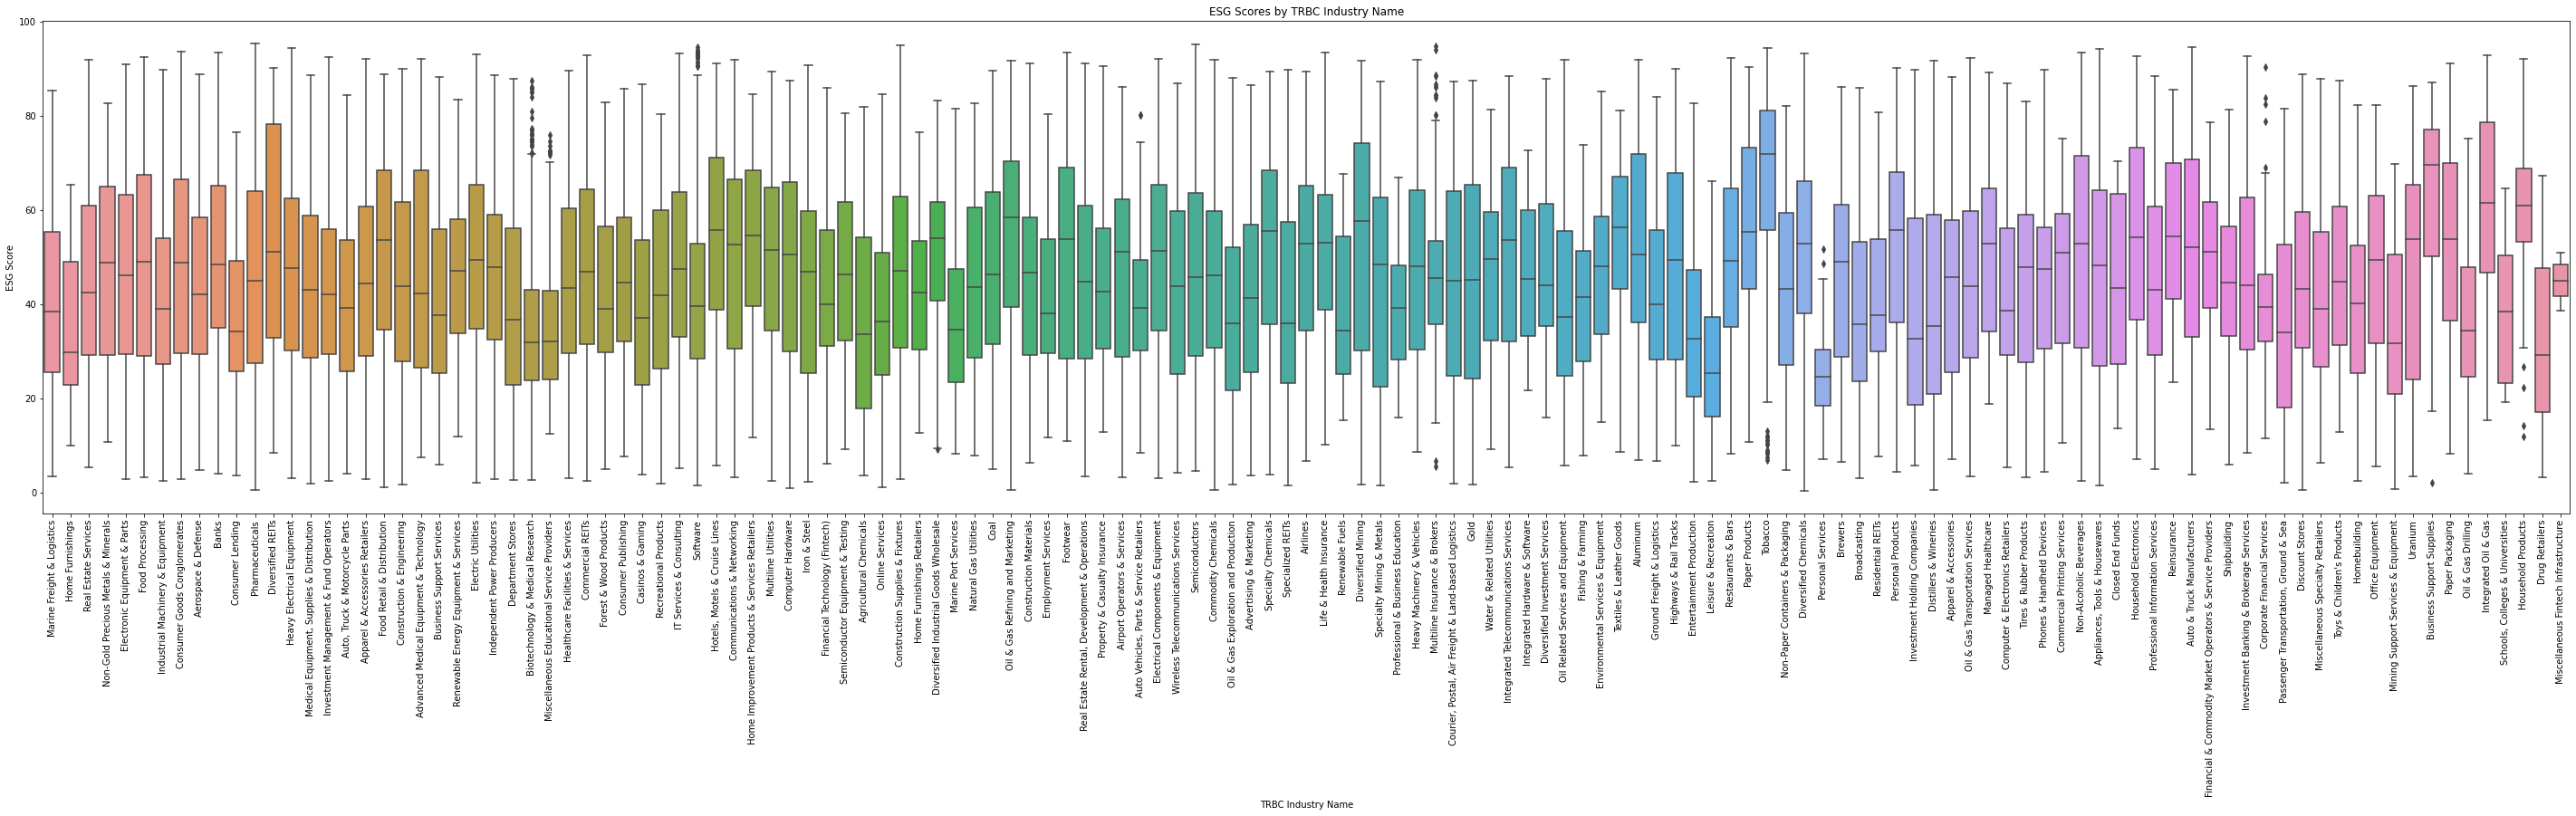

In [21]:
# Correlation between ESG scores and TRBC Industry Name 
plt.figure(figsize=(50, 10))
sns.boxplot(data=df_MAIN_cleaned, x='TRBC Industry Name', y='ESG Score')
plt.xticks(rotation=90)
plt.title('ESG Scores by TRBC Industry Name')
plt.xlabel('TRBC Industry Name')
plt.ylabel('ESG Score')
plt.show()

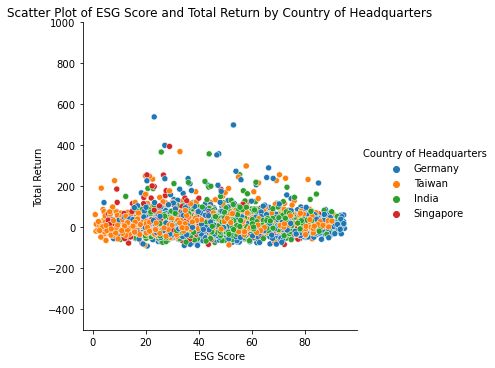

In [22]:
# Scatter plot of ESG score and total return by country of headquarters
countries = ['India', 'Germany', 'Taiwan', 'Singapore']
df_countries = df_MAIN_cleaned[df_MAIN_cleaned['Country of Headquarters'].isin(countries)]

sns.relplot(data=df_countries, x='ESG Score', y='Total Return', hue='Country of Headquarters')
plt.title('Scatter Plot of ESG Score and Total Return by Country of Headquarters')
plt.xlabel('ESG Score')
plt.ylabel('Total Return')
plt.ylim(bottom=-500, top=1000)
plt.show()


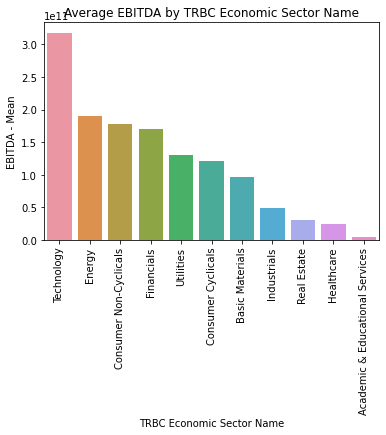

In [23]:
# Average EBITDA by TRBC Economic Sector Name
order = df_MAIN_cleaned.groupby('TRBC Economic Sector Name')['EBITDA - Mean'].mean().sort_values(ascending=False).index
sns.barplot(data=df_MAIN_cleaned, x='TRBC Economic Sector Name', y='EBITDA - Mean', order=order, ci=None)
plt.xticks(rotation=90)
plt.title('Average EBITDA by TRBC Economic Sector Name')
plt.xlabel('TRBC Economic Sector Name')
plt.ylabel('EBITDA - Mean')
plt.show()

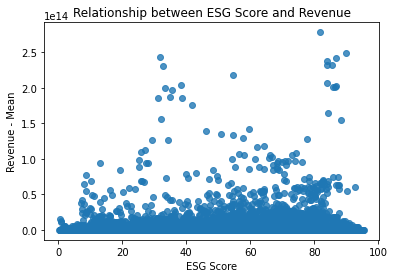

In [24]:
# Relationship between ESG score and revenue
sns.regplot(data=df_MAIN_cleaned, x='ESG Score', y='Revenue - Mean')
plt.title('Relationship between ESG Score and Revenue')
plt.xlabel('ESG Score')
plt.ylabel('Revenue - Mean')
plt.show()

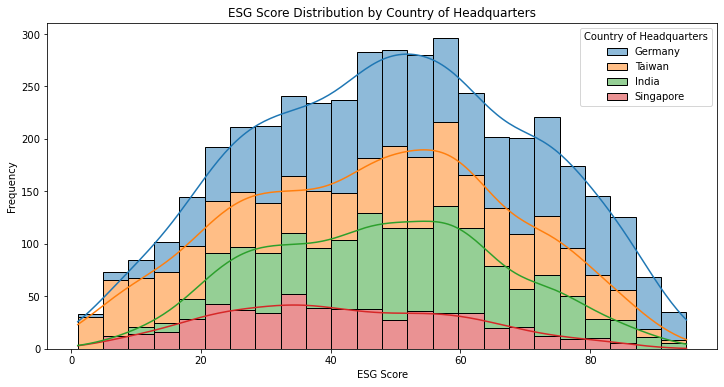

In [25]:
# ESG score distribution by country of headquarters
countries = ['India', 'Germany', 'Taiwan', 'Singapore']
df_countries = df_MAIN_cleaned[df_MAIN_cleaned['Country of Headquarters'].isin(countries)]

plt.figure(figsize=(12, 6))
sns.histplot(data=df_countries, x='ESG Score', hue='Country of Headquarters', kde=True, multiple='stack')
plt.title('ESG Score Distribution by Country of Headquarters')
plt.xlabel('ESG Score')
plt.ylabel('Frequency')
plt.show()

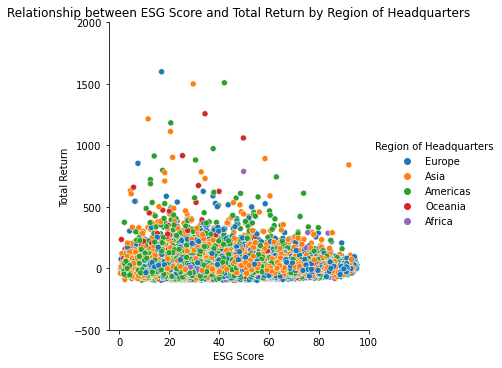

In [26]:
# Relationship between ESG score and total return by region of headquarters
sns.relplot(data=df_MAIN_cleaned, x='ESG Score', y='Total Return', hue='Region of Headquarters')
plt.title('Relationship between ESG Score and Total Return by Region of Headquarters')
plt.xlabel('ESG Score')
plt.ylabel('Total Return')
plt.ylim(bottom=-500, top=2000)
plt.show()

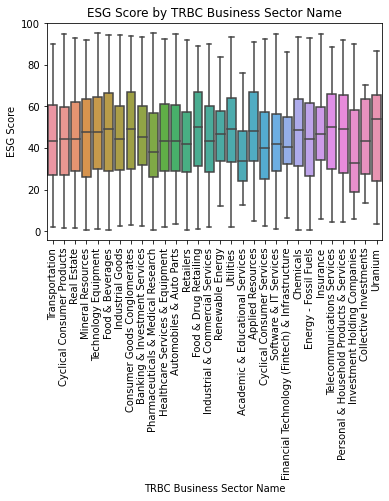

In [27]:
# ESG score by TRBC Business Sector Name
sns.boxplot(data=df_MAIN_cleaned, x='TRBC Business Sector Name', y='ESG Score')
plt.xticks(rotation=90)
plt.title('ESG Score by TRBC Business Sector Name')
plt.xlabel('TRBC Business Sector Name')
plt.ylabel('ESG Score')
plt.show()

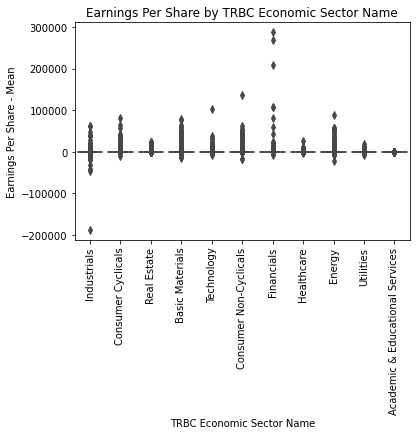

In [28]:
# Earnings per share by TRBC Economic Sector Name
sns.boxplot(data=df_MAIN_cleaned, x='TRBC Economic Sector Name', y='Earnings Per Share - Mean')
plt.xticks(rotation=90)
plt.title('Earnings Per Share by TRBC Economic Sector Name')
plt.xlabel('TRBC Economic Sector Name')
plt.ylabel('Earnings Per Share - Mean')
plt.show()

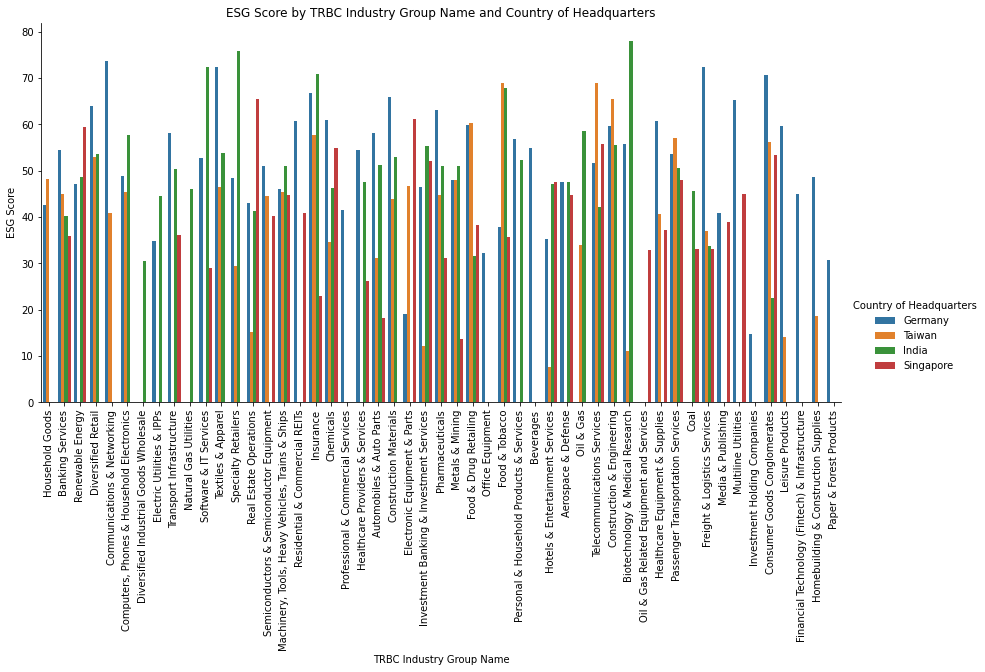

In [29]:
# ESG score by TRBC Industry Group Name and Country of Headquarters
countries_of_interest = ['India', 'Germany', 'Taiwan', 'Singapore']
df_filtered = df_MAIN_cleaned[df_MAIN_cleaned['Country of Headquarters'].isin(countries_of_interest)]

sns.catplot(data=df_filtered, x='TRBC Industry Group Name', y='ESG Score', hue='Country of Headquarters', kind='bar', ci=None, height=6, aspect=2)
plt.xticks(rotation=90)
plt.title('ESG Score by TRBC Industry Group Name and Country of Headquarters')
plt.xlabel('TRBC Industry Group Name')
plt.ylabel('ESG Score')
plt.show()

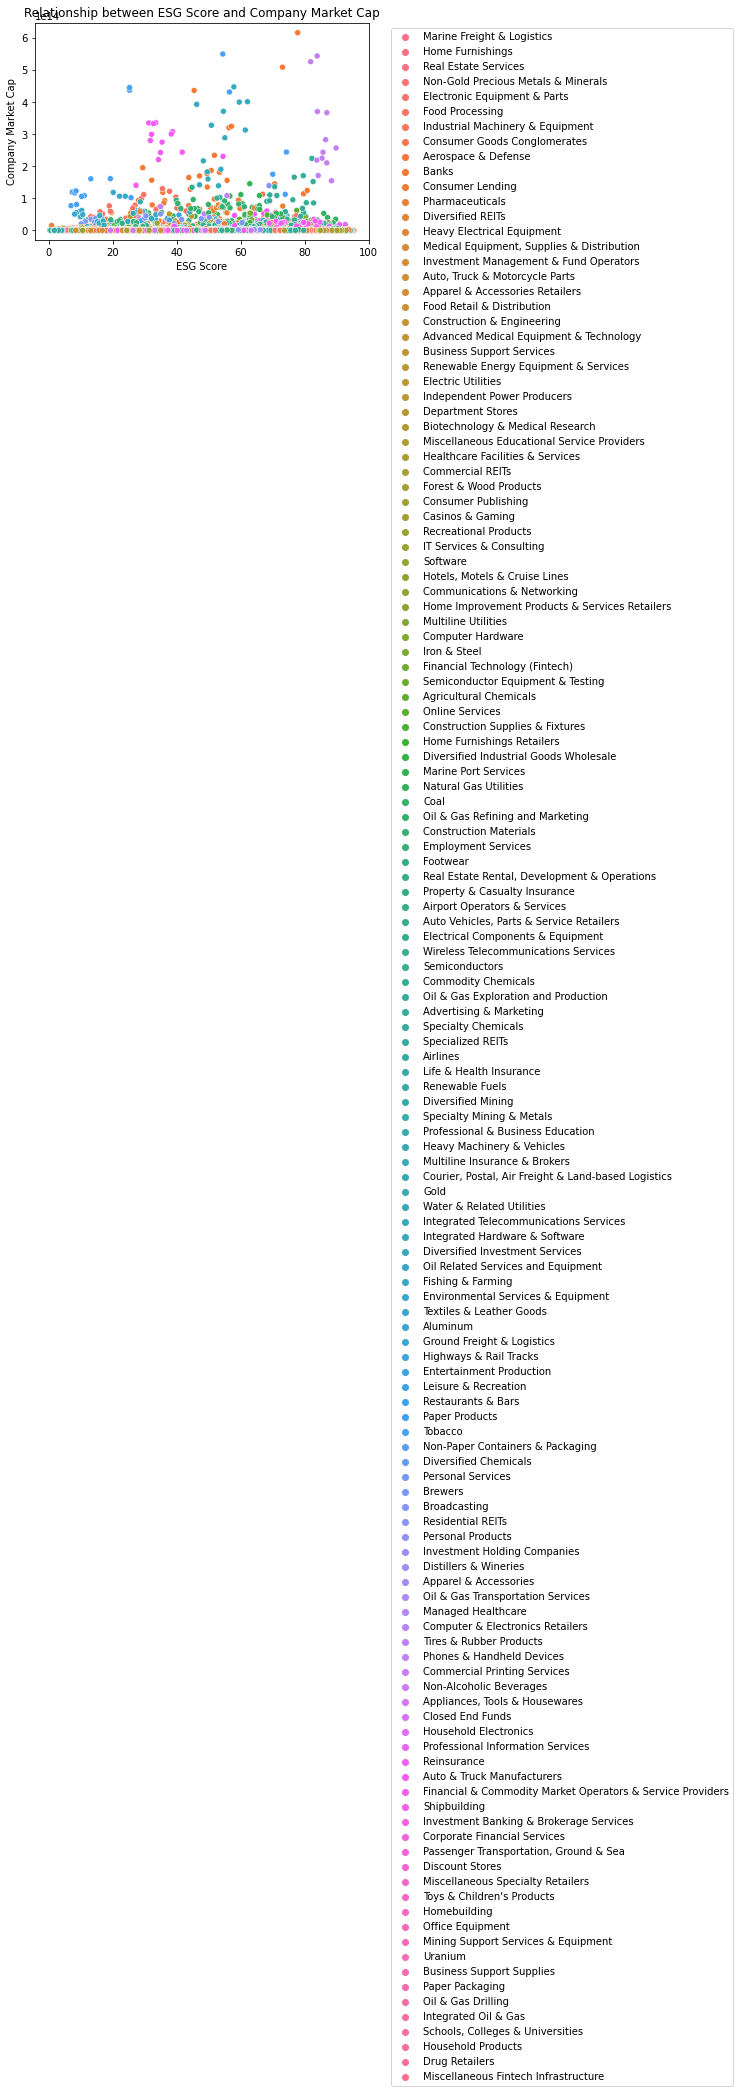

In [30]:
sns.scatterplot(data=df_MAIN_cleaned, x='ESG Score', y='Company Market Cap', hue='TRBC Industry Name')
plt.title('Relationship between ESG Score and Company Market Cap')
plt.xlabel('ESG Score')
plt.ylabel('Company Market Cap')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

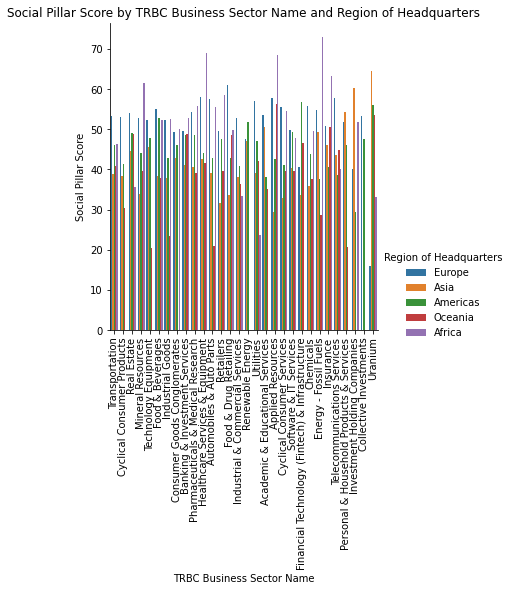

In [31]:
# Social pillar score by TRBC Business Sector Name and Region of Headquarters
sns.catplot(data=df_MAIN_cleaned, x='TRBC Business Sector Name', y='Social Pillar Score', hue='Region of Headquarters', kind='bar', ci=None)
plt.xticks(rotation=90)
plt.title('Social Pillar Score by TRBC Business Sector Name and Region of Headquarters')
plt.xlabel('TRBC Business Sector Name')
plt.ylabel('Social Pillar Score')
plt.show()

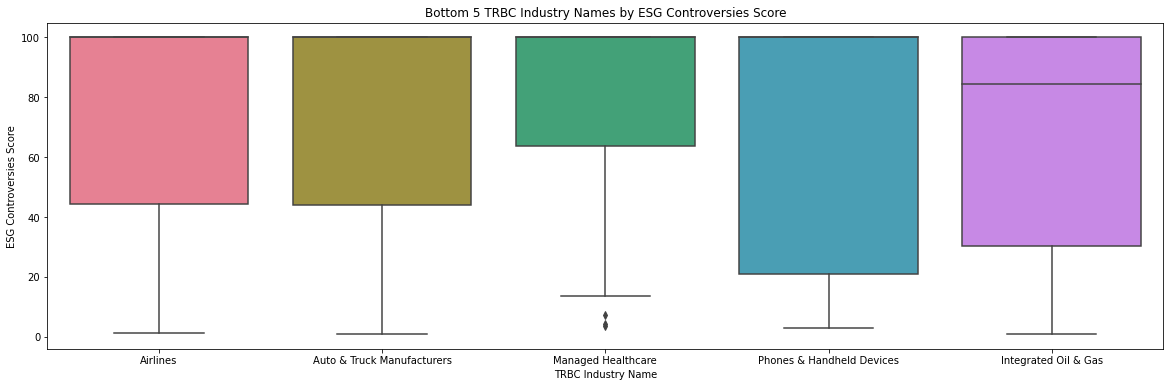

In [57]:
# Bottom 'n' TRBC Industry Name in terms of ESG controversies score
n = 5
bottom_n_industries = df_MAIN_cleaned.groupby('TRBC Industry Name')['ESG Controversies Score'].mean().sort_values().head(n).index.tolist()
df_bottom_n = df_MAIN_cleaned[df_MAIN_cleaned['TRBC Industry Name'].isin(bottom_n_industries)]
df_bottom_n = df_bottom_n.sort_values('ESG Controversies Score', ascending=False)

plt.figure(figsize=(20, 6))
sns.set_palette('husl', n_colors=n)
sns.boxplot(data=df_bottom_n, x='TRBC Industry Name', y='ESG Controversies Score')
#plt.xticks(rotation=90)
plt.title(f'Bottom {n} TRBC Industry Names by ESG Controversies Score')
plt.xlabel('TRBC Industry Name')
plt.ylabel('ESG Controversies Score')
plt.show()

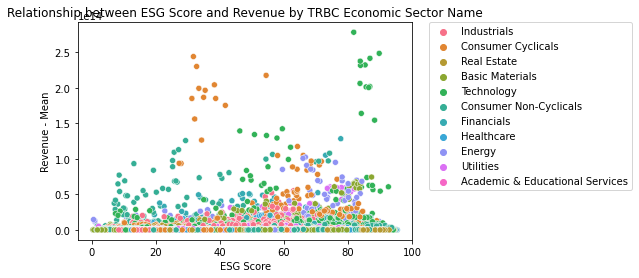

In [33]:
# Relationship between ESG score and revenue by TRBC Economic Sector Name
sns.scatterplot(data=df_MAIN_cleaned, x='ESG Score', y='Revenue - Mean', hue='TRBC Economic Sector Name')
plt.title('Relationship between ESG Score and Revenue by TRBC Economic Sector Name')
plt.xlabel('ESG Score')
plt.ylabel('Revenue - Mean')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()